# 2. 데이터 준비
## 에어비앤비 사용후 만족도 설문조사 데이터
### 주변 에어비앤비 실사용자 고객들 대상으로 한 설문조사 데이터이다.

- 타겟 데이터(airbnb.target)
    1. 에어비앤비 사용 만족도
    
- 특징 데이터(airbnb.data)
    1. 체크인시간
    2. 의사소통
    3. 청결도
    4. 위치
    5. 가격
    6. 호스트별점(슈퍼호스트)
    7. 후기
    8. 호스트응답률

In [1]:
import pandas as pd
import numpy as np

In [2]:
airbnb=pd.read_csv('airbnbsurvey.csv', encoding='euc-kr')
airbnb

,체크인시간,의사소통,청결도,위치,가격,호스트별점(슈퍼호스트),후기,호스트응답률,만족도
0,3,4,5,4,3,4,5,4,4
1,4,2,4,5,4,3,5,5,4
2,5,2,4,4,5,3,4,4,5
3,4,3,5,5,4,4,5,5,5
4,3,3,5,5,3,3,5,2,3
5,5,5,5,3,3,4,5,5,4
6,3,5,5,5,4,4,5,4,5
7,3,4,5,5,4,3,5,4,4
8,3,3,4,5,5,4,4,4,3
9,4,3,5,5,5,4,3,3,4


## StatsModels 모듈을 사용한 선형회귀분석

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

## StatsModels 모듈을 사용한 선형회귀분석

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [5]:
import pandas as pd
# 독립변수
X = pd.DataFrame(airbnb, columns = ["체크인시간", "의사소통", "청결도", "위치", "가격", "호스트별점(슈퍼호스트)", "후기", "호스트응답률"])
# 종속변수
Y = pd.DataFrame(airbnb, columns = ["만족도"]) 

In [6]:
# 데이터 준비
dfX0 = pd.DataFrame(airbnb, columns = ["체크인시간", "의사소통", "청결도", "위치", "가격", "호스트별점(슈퍼호스트)", "후기", "호스트응답률"]) # 독립변수
dfX = sm.add_constant(dfX0) # 자동으로 상수항을 만들어주지 않기 때문에 사용자가 add_constant 명령으로 상수항을 추가해야 한다.
dfy = pd.DataFrame(airbnb, columns = ["만족도"]) # 종속변수

In [7]:
# model_airbnb라는 이름으로 OLS 모델 구조화
model_airbnb = sm.OLS(dfy, dfX) # (종속변수, 독립변수)

# OLS 회귀모형 피팅
result_airbnb = model_airbnb.fit()

# 회귀분석 결과 요약
print(result_airbnb.summary())

                            OLS Regression Results                            
Dep. Variable:                    만족도   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     11.98
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           3.36e-09
Time:                        19:22:35   Log-Likelihood:                -43.649
No. Observations:                  57   AIC:                             105.3
Df Residuals:                      48   BIC:                             123.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9060      0.488     -1.855   

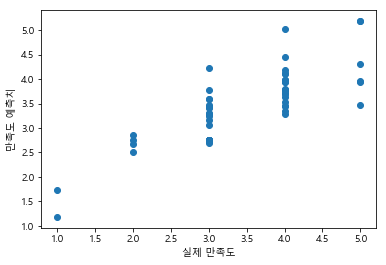

In [8]:
dfy_new = result_airbnb.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"실제 만족도")
plt.ylabel(u"만족도 예측치")
plt.show()

In [9]:
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

font = "NanumPen"
font_path = "%s.ttf" % font

icon = "airbnb-logo" 
icon_path = "%s.png" % icon

# 워드 클라우드(단어구름)

In [71]:
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "airbnb-logo" 
icon_path = "%s.png" % icon

### 데이터 입력

In [73]:
# 후기 안좋은 숙소
f = open("badreview.txt", 'r', encoding='euc-kr')
message_of_guests = f.read()
print(message_of_guests)
f.close()

신논현역 근처라 지하철로 이동가능해서 편해요. 주변에 슈퍼랑 편의점도 있고 바로 도심이라 괜찮아요. 다만 방이 1층이긴 한데 사실상 반지하라 햇빛도 잘 들지 않고 밤에 들어오면 쿱쿱한 지하 냄새가 나요. 이 점은 숙소 소개에 나와있지 않아서 참고하셔야 해요. 그리고 호스트 분이 굉장히 친절하세요. 하지만 해외에 거주하고 계신지 낮시간에는 연락이 잘 되지 않더라고요.


거리와 리뷰를 보고 첫 에어비앤비 숙소를 여기로 결정했습니다. 사전에 도착시간을 알려드렸고, 당일 체크인하려는데 알려주신 비밀번호가 틀리다고해서 연락, (10분정도 문앞에 서서 기다림) 연락이 늦어지니 초조하고 일정을 위해 움직여야하는데 시간을 낭비했습니다. 혼자 묵기에는 작지도 크지도 않은 방인데 침대 한개 + 바닥 매트리스가 하나 더 깔려있어서 불편했습니다. 바닥과 침대에 머리카락도 한두어개있었고 심지어 작은 유리조각 같은 밟으면 안될뻔한것도 발견, (셀프로 방청소함) 냉장고에는 누가 먹으려했는지 단무지도 있었어요. 욕실은 물이 천천히 빠지는데 욕실이 현관옆이라 슬리퍼가 없으면 발이 더러워져요. 수건은 2개 요청했었는데 한개뿐이라 직접 가질러갔어요(수건 냄새가 퀘퀘함), 전체적인 분위기는 모던하고 깔끔했는데 자세히보니 위생에 문제가 있네요. 첫 에어앤비의 경험이 좋지 않아서 덕분에 신중해질꺼같네요.


더러운 이불


원룸형 오피스텔이었구요, 역에서 가까운 거리, 어느 쪽으로 가도 3분 내로 있는 편의점 및 카페, 강남역/교대역 등 이동 편리한 위치인 게 최고 장점. 하지만 노후된 욕실(칠이 벗겨지거나, 떼탔거나, 깨끗하다고 느껴지진 않음)과 사용은 안했지만 주방과 냉장고 상태도 좋다고는 못하겠네요. 냉장고에는 이전 게스트 것인지, 호스트분 것인지 모를 음식들이 남아있었고 냉동실 칸에는 뭘 넣어도 괜찮은걸까 싶게 흙먼지?같은 게 깔려있었어요. 쓰레기통도 완전히 비지 않은 상태로 휴지같은게 차있었고..해서 위생상태는 아쉽습니다. 그래도 온수 잘 나오고 수압도 괜찮고 머무르기에 크게 불편한점은 

In [74]:
# 후기 좋은 숙소
f = open( "AirBnB_reviews.txt", "r")
message_of_ab = f.read()
print(message_of_ab)
f.close()

깨끗한 게스트하우스 실내와 주변의 시끄러운 소음도 생각보다 없었으며, 밖에 나가면 바로 옆 편의점도 있고 조금만 더 나가면 음식점과 가게들도 많아서 좋았습니다


위치가 홍대 입구역 바로 근처라 너무 좋았어요! 수건도 많이 준비되어있었고 생수도 준비해주셨고 무엇보다 방이 너무 따듯해서 요즘같은 날씨에 최고였어요~ 다음에 꼭 또 이용하고 싶은 숙소 였습니다=)


빠른 응답과 친절한 설명에 너무 좋았습니다. 나중에 또 묵고 싶을 정도네요!^^ 숙소 위치도 역과 근접해서 너무 편했습니다~


너무 괜찮았어요! 건물이 낡아서 걱정했는데 들어가보면 완전 딴판입니다 물론 주변이 밤이 되면 살짝 무섭고 시끄럽긴 해도 완전 만족입니다


호스트 분이 일단 너무너무 좋았습니다. 친절하게 답변도 하나하나 빠르게 해주셔서 너무너무 좋았습니다. 호스트 분 만큼 숙소 또한 깔끔하고 깨끗하였습니다. 다음에도 홍대에서 놀 일이 생기면 꼭 다시 머물고 싶은 숙소입니다~ 좋은 숙소에서 잘 쉬다 갑니당 후회 안하실 숙소에욤!!


너무 잘묵고 갑니다. 편하고 숙소가 넓고 아늑하고 정말 좋았어요. 역이랑도 가깝고 이동하기에도 편했습니다


무엇보다 역에서 멀지 않다는 점이 좋았고 건물외관은 조금 오래?記뼉 모르겠지만 숙소에 들어갔을때 너무 예쁘고 깔끔해서 좋았습니다! 메세지 답도 빠르게 해주십니다 다음에도 또 묶고 싶은곳이에요 :)


일단 접근성도 너무 좋구! 바로앞에 공원이 있어서 산책하기도 좋았어요!! 수건도 넉넉히 주셔서 부족함없이 잘사용했구요:) 무엇보다도 호스트님의 배려가 너무너무 느껴지는 공간이었어요!!


위치가너무좋고 깨끗하고 좋았아요:)


홍대 번화가랑 완전 가깝고 사진그대로 깔끔합니다! 호스트분도 친절하고 잘 쉬다 왔어요! 건물자체는 상당히 낡아서 걱정했는데 편하게 쉬다왔습니다:)


11시까지 나가야되는데 12시에 나가도된다고해서 감사드리고 가격대비 좋은 숙소였습니다


깔끔하고 좋은 곳에 위치해있어요 서울역 - 공항 모두 이용할 수 있는 7번출구 근처고 경춘선 탈 

In [75]:
# 후기 안좋은 숙소 전처리
message_of_guests = message_of_guests.split('\n\n')
message_of_guests

['신논현역 근처라 지하철로 이동가능해서 편해요. 주변에 슈퍼랑 편의점도 있고 바로 도심이라 괜찮아요. 다만 방이 1층이긴 한데 사실상 반지하라 햇빛도 잘 들지 않고 밤에 들어오면 쿱쿱한 지하 냄새가 나요. 이 점은 숙소 소개에 나와있지 않아서 참고하셔야 해요. 그리고 호스트 분이 굉장히 친절하세요. 하지만 해외에 거주하고 계신지 낮시간에는 연락이 잘 되지 않더라고요.',
 '\n거리와 리뷰를 보고 첫 에어비앤비 숙소를 여기로 결정했습니다. 사전에 도착시간을 알려드렸고, 당일 체크인하려는데 알려주신 비밀번호가 틀리다고해서 연락, (10분정도 문앞에 서서 기다림) 연락이 늦어지니 초조하고 일정을 위해 움직여야하는데 시간을 낭비했습니다. 혼자 묵기에는 작지도 크지도 않은 방인데 침대 한개 + 바닥 매트리스가 하나 더 깔려있어서 불편했습니다. 바닥과 침대에 머리카락도 한두어개있었고 심지어 작은 유리조각 같은 밟으면 안될뻔한것도 발견, (셀프로 방청소함) 냉장고에는 누가 먹으려했는지 단무지도 있었어요. 욕실은 물이 천천히 빠지는데 욕실이 현관옆이라 슬리퍼가 없으면 발이 더러워져요. 수건은 2개 요청했었는데 한개뿐이라 직접 가질러갔어요(수건 냄새가 퀘퀘함), 전체적인 분위기는 모던하고 깔끔했는데 자세히보니 위생에 문제가 있네요. 첫 에어앤비의 경험이 좋지 않아서 덕분에 신중해질꺼같네요.',
 '\n더러운 이불',
 '\n원룸형 오피스텔이었구요, 역에서 가까운 거리, 어느 쪽으로 가도 3분 내로 있는 편의점 및 카페, 강남역/교대역 등 이동 편리한 위치인 게 최고 장점. 하지만 노후된 욕실(칠이 벗겨지거나, 떼탔거나, 깨끗하다고 느껴지진 않음)과 사용은 안했지만 주방과 냉장고 상태도 좋다고는 못하겠네요. 냉장고에는 이전 게스트 것인지, 호스트분 것인지 모를 음식들이 남아있었고 냉동실 칸에는 뭘 넣어도 괜찮은걸까 싶게 흙먼지?같은 게 깔려있었어요. 쓰레기통도 완전히 비지 않은 상태로 휴지같은게 차있었고..해서 위생상태는 아쉽습니다. 그래도 온수 잘 나오고 수압도 괜찮고 머

In [76]:
# 후기 좋은 숙소 전처리
message_of_ab = message_of_ab.split('\n\n')
message_of_ab

['깨끗한 게스트하우스 실내와 주변의 시끄러운 소음도 생각보다 없었으며, 밖에 나가면 바로 옆 편의점도 있고 조금만 더 나가면 음식점과 가게들도 많아서 좋았습니다',
 '\n위치가 홍대 입구역 바로 근처라 너무 좋았어요! 수건도 많이 준비되어있었고 생수도 준비해주셨고 무엇보다 방이 너무 따듯해서 요즘같은 날씨에 최고였어요~ 다음에 꼭 또 이용하고 싶은 숙소 였습니다=)',
 '\n빠른 응답과 친절한 설명에 너무 좋았습니다. 나중에 또 묵고 싶을 정도네요!^^ 숙소 위치도 역과 근접해서 너무 편했습니다~',
 '\n너무 괜찮았어요! 건물이 낡아서 걱정했는데 들어가보면 완전 딴판입니다 물론 주변이 밤이 되면 살짝 무섭고 시끄럽긴 해도 완전 만족입니다',
 '\n호스트 분이 일단 너무너무 좋았습니다. 친절하게 답변도 하나하나 빠르게 해주셔서 너무너무 좋았습니다. 호스트 분 만큼 숙소 또한 깔끔하고 깨끗하였습니다. 다음에도 홍대에서 놀 일이 생기면 꼭 다시 머물고 싶은 숙소입니다~ 좋은 숙소에서 잘 쉬다 갑니당 후회 안하실 숙소에욤!!',
 '\n너무 잘묵고 갑니다. 편하고 숙소가 넓고 아늑하고 정말 좋았어요. 역이랑도 가깝고 이동하기에도 편했습니다',
 '\n무엇보다 역에서 멀지 않다는 점이 좋았고 건물외관은 조금 오래?記뼉\x1a 모르겠지만 숙소에 들어갔을때 너무 예쁘고 깔끔해서 좋았습니다! 메세지 답도 빠르게 해주십니다 다음에도 또 묶고 싶은곳이에요 :)',
 '\n일단 접근성도 너무 좋구! 바로앞에 공원이 있어서 산책하기도 좋았어요!! 수건도 넉넉히 주셔서 부족함없이 잘사용했구요:) 무엇보다도 호스트님의 배려가 너무너무 느껴지는 공간이었어요!!',
 '\n위치가너무좋고 깨끗하고 좋았아요:)',
 '\n홍대 번화가랑 완전 가깝고 사진그대로 깔끔합니다! 호스트분도 친절하고 잘 쉬다 왔어요! 건물자체는 상당히 낡아서 걱정했는데 편하게 쉬다왔습니다:)',
 '\n11시까지 나가야되는데 12시에 나가도된다고해서 감사드리고 가격대비 좋은 숙소였습니다',
 '\n깔끔하고 

In [77]:
# 후기 안좋은 숙소 빈도 계산
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_guests)
tf_bow1 = tf_vectorizer.fit_transform(message_of_guests)
tf_bow1

<17x654 sparse matrix of type '<class 'numpy.int64'>'
	with 715 stored elements in Compressed Sparse Row format>

In [78]:
# 좋은 후기 빈도 계산
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_ab)
tf_bow2 = tf_vectorizer.fit_transform(message_of_ab)
tf_bow2

<60x876 sparse matrix of type '<class 'numpy.int64'>'
	with 1293 stored elements in Compressed Sparse Row format>

In [79]:
# 후기 안좋은 숙소 
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_corpus1.get_feature_names()

654
654


['10분정도',
 '1시간을',
 '1층이긴',
 '2개',
 '2개있는',
 '2명이서',
 '2박',
 '3분',
 '4시간',
 '5시간',
 '7시',
 '8시',
 'mom님',
 'mori',
 'ㅋㅋ',
 'ㅋㅋㅋ',
 'ㅎㅎㅋㅋ',
 '가격에',
 '가격으로',
 '가격이',
 '가기엔',
 '가까우며',
 '가까운',
 '가까웠습니다',
 '가까이',
 '가도',
 '가로등이',
 '가야할듯',
 '가장',
 '가질러갔어요',
 '감사해요',
 '갔는데',
 '갔더니',
 '강남역',
 '같은',
 '같이',
 '개선되어야',
 '개인의',
 '거리',
 '거리와',
 '거주하고',
 '건물',
 '건물과',
 '건물입구까지',
 '걸립니다',
 '걸으면',
 '것을',
 '것인지',
 '게스트',
 '게스트들에게',
 '게스트분들께는',
 '결국',
 '결론',
 '결정했습니다',
 '경우',
 '경험이',
 '계신지',
 '고시룸',
 '곳곳에',
 '곳곳이',
 '공간이',
 '공유기',
 '공항',
 '괜찮고',
 '괜찮아요',
 '괜찮은걸까',
 '굉장히',
 '교대역',
 '교통',
 '구석등',
 '굴러다닙니다',
 '귀찮아서',
 '그거',
 '그거빼고는',
 '그게',
 '그냥',
 '그래도',
 '그런것들이',
 '그리고',
 '근처',
 '근처라',
 '급하게',
 '기다려야',
 '기다리기',
 '기다림',
 '기분',
 '깔끔한',
 '깔끔했는데',
 '깔려있어서',
 '깔려있었어요',
 '깨끗하고',
 '깨끗하다고',
 '깨끗한',
 '깨끗해용',
 '나쁜투로',
 '나오고',
 '나온',
 '나와있지',
 '나요',
 '난방은',
 '날씨가',
 '낡은',
 '남들이',
 '남아있었고',
 '남의',
 '났습니다',
 '낭비했습니다',
 '낮시간에는',
 '내려서',
 '내로',
 '냄새가',
 '냉동실',
 '냉장고',
 '냉장고를',
 '냉장고에는',
 '너무',
 '넓어서',
 '넣어도',
 '넣어줬는데',
 

In [80]:
# 후기 좋은 숙소
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_corpus2.get_feature_names()

876
876


['10분거리에',
 '11시까지',
 '12시에',
 '1박',
 '1번출구랑',
 '1번출구에서',
 '2일을',
 '5개',
 '7번',
 '7번출구',
 '8인분이',
 'airbnb',
 'by',
 'egg도',
 'hidden',
 'host분도',
 'sns인스타',
 'ㅎㅎ',
 '記뼉',
 '가게들도',
 '가격과',
 '가격대비',
 '가까운',
 '가까운곳에',
 '가까워',
 '가까워서',
 '가깝고',
 '가깝습니다',
 '가는',
 '가도',
 '가봤던',
 '가스레인지',
 '가족',
 '가지고',
 '각침대마다',
 '감사드리고',
 '감사하고',
 '감사합니다',
 '감탄했습니다',
 '갑니다',
 '갑니당',
 '갔던',
 '갔습니다',
 '갖다주셔서',
 '같아요',
 '같은것도',
 '같이',
 '같이간',
 '개조한느낌이라',
 '객실은',
 '거슬리는',
 '거실에도',
 '걱정했는데',
 '건물외관은',
 '건물이',
 '건물자체는',
 '걸어가서',
 '걸어나가면',
 '걸어서',
 '것도',
 '것보다',
 '것이',
 '게스트하우스',
 '겨울',
 '경우',
 '경의중앙도',
 '경춘선',
 '계시는구나',
 '고생했던',
 '고스란히',
 '골목만',
 '골목이라',
 '곳도',
 '곳에',
 '곳은',
 '곳입니다',
 '공간도',
 '공간이었어요',
 '공연도',
 '공원에서',
 '공원이',
 '공항',
 '과장된것이',
 '괜찮았어요',
 '굉장히',
 '교통도',
 '구비되어',
 '구비시설도',
 '구비시설에',
 '구조로',
 '국회의사당까지',
 '그대로',
 '그런지',
 '그렇다고',
 '그리고',
 '그자체였어요',
 '근접성이',
 '근접해서',
 '근처',
 '근처가',
 '근처고',
 '근처네요',
 '근처라',
 '근처라서',
 '근처에',
 '근처에서',
 '금방사라졌습니다',
 '기분',
 '기분이',
 '기분좋게',
 '기억이',
 '기차',
 '기회가',
 '길가에',
 '길

In [81]:
# 후기 안좋은 숙소
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['10분정도', '1시간을', '1층이긴', '2개', '2개있는', '2명이서', '2박', '3분', '4시간', '5시간', '7시', '8시', 'mom님', 'mori', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎㅋㅋ', '가격에', '가격으로', '가격이', '가기엔', '가까우며', '가까운', '가까웠습니다', '가까이', '가도', '가로등이', '가야할듯', '가장', '가질러갔어요', '감사해요', '갔는데', '갔더니', '강남역', '같은', '같이', '개선되어야', '개인의', '거리', '거리와', '거주하고', '건물', '건물과', '건물입구까지', '걸립니다', '걸으면', '것을', '것인지', '게스트', '게스트들에게', '게스트분들께는', '결국', '결론', '결정했습니다', '경우', '경험이', '계신지', '고시룸', '곳곳에', '곳곳이', '공간이', '공유기', '공항', '괜찮고', '괜찮아요', '괜찮은걸까', '굉장히', '교대역', '교통', '구석등', '굴러다닙니다', '귀찮아서', '그거', '그거빼고는', '그게', '그냥', '그래도', '그런것들이', '그리고', '근처', '근처라', '급하게', '기다려야', '기다리기', '기다림', '기분', '깔끔한', '깔끔했는데', '깔려있어서', '깔려있었어요', '깨끗하고', '깨끗하다고', '깨끗한', '깨끗해용', '나쁜투로', '나오고', '나온', '나와있지', '나요', '난방은', '날씨가', '낡은', '남들이', '남아있었고', '남의', '났습니다', '낭비했습니다', '낮시간에는', '내려서', '내로', '냄새가', '냉동실', '냉장고', '냉장고를', '냉장고에는', '너무', '넓어서', '넣어도', '넣어줬는데', '네비따라', '노후된', '녹은', '놔두고', '놔둔건지', '누가', '누르는', '느껴지진', '느낌임', '늦게', '늦어지니', '늦어진', '늦은밤도착해', '늦은시간', '다니긴', '다니는', '다

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 2, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,

In [82]:
# 후기 좋은 숙소
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2


['10분거리에', '11시까지', '12시에', '1박', '1번출구랑', '1번출구에서', '2일을', '5개', '7번', '7번출구', '8인분이', 'airbnb', 'by', 'egg도', 'hidden', 'host분도', 'sns인스타', 'ㅎㅎ', '記뼉', '가게들도', '가격과', '가격대비', '가까운', '가까운곳에', '가까워', '가까워서', '가깝고', '가깝습니다', '가는', '가도', '가봤던', '가스레인지', '가족', '가지고', '각침대마다', '감사드리고', '감사하고', '감사합니다', '감탄했습니다', '갑니다', '갑니당', '갔던', '갔습니다', '갖다주셔서', '같아요', '같은것도', '같이', '같이간', '개조한느낌이라', '객실은', '거슬리는', '거실에도', '걱정했는데', '건물외관은', '건물이', '건물자체는', '걸어가서', '걸어나가면', '걸어서', '것도', '것보다', '것이', '게스트하우스', '겨울', '경우', '경의중앙도', '경춘선', '계시는구나', '고생했던', '고스란히', '골목만', '골목이라', '곳도', '곳에', '곳은', '곳입니다', '공간도', '공간이었어요', '공연도', '공원에서', '공원이', '공항', '과장된것이', '괜찮았어요', '굉장히', '교통도', '구비되어', '구비시설도', '구비시설에', '구조로', '국회의사당까지', '그대로', '그런지', '그렇다고', '그리고', '그자체였어요', '근접성이', '근접해서', '근처', '근처가', '근처고', '근처네요', '근처라', '근처라서', '근처에', '근처에서', '금방사라졌습니다', '기분', '기분이', '기분좋게', '기억이', '기차', '기회가', '길가에', '길치인', '깃들어져', '깊숙이', '깔끔하게', '깔끔하고', '깔끔하네요', '깔끔한', '깔끔한인테리어에', '깔끔합니다', '깔끔해서', '깔끔해요', '깨끗하게청소되어지고', '깨끗하고', '깨끗

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  1,  1,  2,  1,  1,  1,  5,  5,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  3,  2,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,
        3,  1,  1,  1,  1,  1,  1,  2,  1,  6,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  7,
        1,  1,  1,  2,  5,  1,  1, 14,  1,  4,  1,  3,  1,  1,  2,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  2,  1,  1,  1,  2,  1,  1,  2,  1,  1, 33,  1,  3,  1,  3,
        1,  1,  2,  1,  7,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  4,  2,  1,  7,
        3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  3,  1

In [83]:
# 후기 안좋은 숙소
# 단어별 글자수 확인
tf_word_dict1

{'10분정도': 1,
 '1시간을': 1,
 '1층이긴': 1,
 '2개': 1,
 '2개있는': 1,
 '2명이서': 1,
 '2박': 1,
 '3분': 1,
 '4시간': 1,
 '5시간': 1,
 '7시': 1,
 '8시': 1,
 'mom님': 1,
 'mori': 1,
 'ㅋㅋ': 1,
 'ㅋㅋㅋ': 1,
 'ㅎㅎㅋㅋ': 1,
 '가격에': 1,
 '가격으로': 1,
 '가격이': 1,
 '가기엔': 1,
 '가까우며': 1,
 '가까운': 1,
 '가까웠습니다': 1,
 '가까이': 1,
 '가도': 1,
 '가로등이': 1,
 '가야할듯': 1,
 '가장': 1,
 '가질러갔어요': 1,
 '감사해요': 1,
 '갔는데': 1,
 '갔더니': 1,
 '강남역': 1,
 '같은': 2,
 '같이': 1,
 '개선되어야': 1,
 '개인의': 1,
 '거리': 1,
 '거리와': 1,
 '거주하고': 1,
 '건물': 1,
 '건물과': 1,
 '건물입구까지': 1,
 '걸립니다': 1,
 '걸으면': 1,
 '것을': 1,
 '것인지': 2,
 '게스트': 1,
 '게스트들에게': 1,
 '게스트분들께는': 1,
 '결국': 1,
 '결론': 1,
 '결정했습니다': 1,
 '경우': 1,
 '경험이': 1,
 '계신지': 1,
 '고시룸': 1,
 '곳곳에': 1,
 '곳곳이': 1,
 '공간이': 1,
 '공유기': 1,
 '공항': 1,
 '괜찮고': 1,
 '괜찮아요': 1,
 '괜찮은걸까': 1,
 '굉장히': 5,
 '교대역': 1,
 '교통': 1,
 '구석등': 1,
 '굴러다닙니다': 1,
 '귀찮아서': 1,
 '그거': 1,
 '그거빼고는': 1,
 '그게': 1,
 '그냥': 1,
 '그래도': 1,
 '그런것들이': 1,
 '그리고': 3,
 '근처': 1,
 '근처라': 1,
 '급하게': 1,
 '기다려야': 1,
 '기다리기': 1,
 '기다림': 1,
 '기분': 1,
 '깔끔한': 2,
 '깔끔했는데': 1,
 '깔

In [84]:
# 후기 좋은 숙소
# 단어별 글자수 확인
tf_word_dict2

{'10분거리에': 1,
 '11시까지': 1,
 '12시에': 1,
 '1박': 1,
 '1번출구랑': 1,
 '1번출구에서': 1,
 '2일을': 1,
 '5개': 1,
 '7번': 1,
 '7번출구': 1,
 '8인분이': 1,
 'airbnb': 1,
 'by': 1,
 'egg도': 1,
 'hidden': 1,
 'host분도': 1,
 'sns인스타': 1,
 'ㅎㅎ': 2,
 '記뼉': 1,
 '가게들도': 1,
 '가격과': 1,
 '가격대비': 2,
 '가까운': 1,
 '가까운곳에': 1,
 '가까워': 1,
 '가까워서': 5,
 '가깝고': 5,
 '가깝습니다': 1,
 '가는': 1,
 '가도': 1,
 '가봤던': 1,
 '가스레인지': 1,
 '가족': 1,
 '가지고': 1,
 '각침대마다': 1,
 '감사드리고': 1,
 '감사하고': 1,
 '감사합니다': 1,
 '감탄했습니다': 1,
 '갑니다': 6,
 '갑니당': 1,
 '갔던': 1,
 '갔습니다': 1,
 '갖다주셔서': 1,
 '같아요': 3,
 '같은것도': 2,
 '같이': 1,
 '같이간': 1,
 '개조한느낌이라': 1,
 '객실은': 1,
 '거슬리는': 1,
 '거실에도': 1,
 '걱정했는데': 2,
 '건물외관은': 1,
 '건물이': 1,
 '건물자체는': 1,
 '걸어가서': 1,
 '걸어나가면': 1,
 '걸어서': 1,
 '것도': 1,
 '것보다': 1,
 '것이': 2,
 '게스트하우스': 1,
 '겨울': 1,
 '경우': 1,
 '경의중앙도': 1,
 '경춘선': 1,
 '계시는구나': 1,
 '고생했던': 1,
 '고스란히': 1,
 '골목만': 1,
 '골목이라': 1,
 '곳도': 1,
 '곳에': 2,
 '곳은': 1,
 '곳입니다': 1,
 '공간도': 1,
 '공간이었어요': 1,
 '공연도': 1,
 '공원에서': 1,
 '공원이': 1,
 '공항': 1,
 '과장된것이': 1,
 '괜찮았어요': 1,
 '굉장히': 5,
 

### 시각화

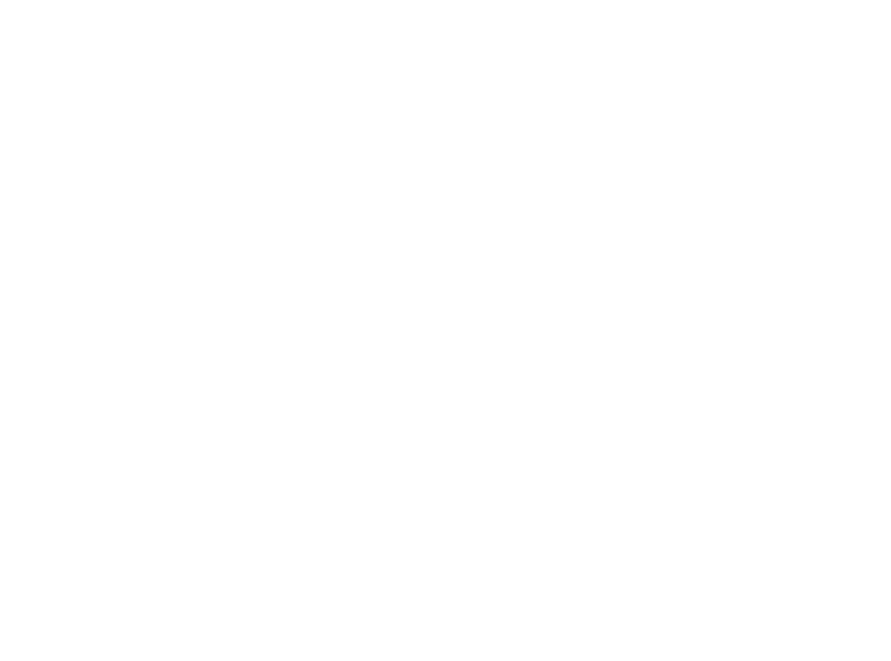

In [85]:
# 후기 안좋은 숙소
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(15, 45))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("bad.png") # 그림파일로 추출하기

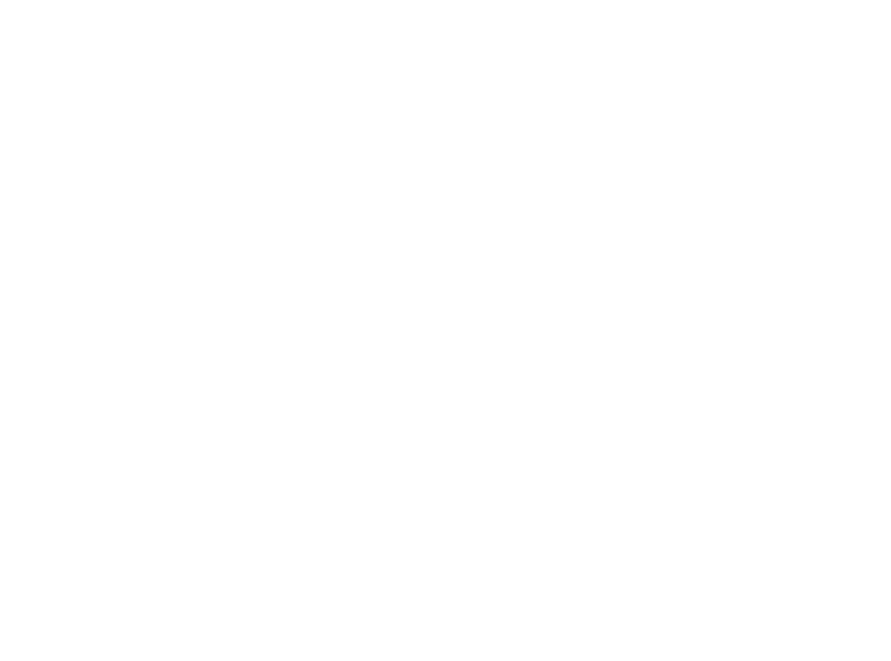

In [86]:
# 후기 좋은 숙소 워드 클라우드
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(15, 45))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("good.png") # 그림파일로 추출하기